HW3 –運用backward induction計算出各節點價格及hedge ratio

In [1]:
#python-test
#stock price、u、d、r、stike price
import numpy

option_type = str(input("enter \" c \" for call；\" p \" for put  : "))
s_p = float(input("enter stock price : "))
u = float(input("enter upward : "))
d = float(input("enter downward : "))
r_input = float(input("enter rate : "))
strike = float(input("enter stike price : "))
period = int(input("enter period : "))

# pre-calculate
r = numpy.exp(r_input)
p = (r - d)/(u - d)

s_price = [] # list for possible stock price
o_price = [] # list for possible option price
probability_rate = []
for i in range(period+1):
    s_price.append([])
    o_price.append([])
    probability_rate.append([])
# stock prices and probabilities for all periods
for j in range(period+1):
    for g in range(j+1):
        s_price[j].append(round(s_p*(u**(j-g))*((d)**(g)),3))
        probability_rate[j].append(round(1*(p**(j-g))*((1-p)**(g)),period+1))

# final return for call option
if option_type == "c":
    for i in range(len(s_price[-1])):
        if s_price[-1][i]-strike > 0:
            return_of_option = s_price[-1][i]-strike
        else:
            return_of_option = 0
        o_price[-1].append(return_of_option)

# final return for put option
if option_type == "p":
    for i in range(len(s_price[-1])):
        if strike - s_price[-1][i] > 0:
            return_of_option = strike - s_price[-1][i]
        else:
            return_of_option = 0
        o_price[-1].append(round(return_of_option,3))

for i in range(period):
    for j in range(period-i):
        o_price[period-i-1].append(round( (o_price[period-i][j]*p + o_price[period-i][j+1]*(1-p))/r,3))
        
print("o_price ",o_price)
print("s_price ",s_price)
print("probability_rate ",probability_rate)
print("option value is ",o_price[0][0])

enter " c " for call；" p " for put  : c
enter stock price : 160
enter upward : 1.5
enter downward : 0.5
enter rate : 0.18232
enter stike price : 150
enter period : 3
o_price  [[85.069], [141.458, 10.208], [235.0, 17.5, 0.0], [390.0, 30.0, 0, 0]]
s_price  [[160.0], [240.0, 80.0], [360.0, 120.0, 40.0], [540.0, 180.0, 60.0, 20.0]]
probability_rate  [[1.0], [0.7, 0.3], [0.49, 0.21, 0.09], [0.343, 0.147, 0.063, 0.027]]
option value is  85.069


[[85.069, 141.458, 235.0, 390.0], [' ', 10.208, 17.5, 30.0], [' ', ' ', 0.0, 0], [' ', ' ', ' ', 0]]


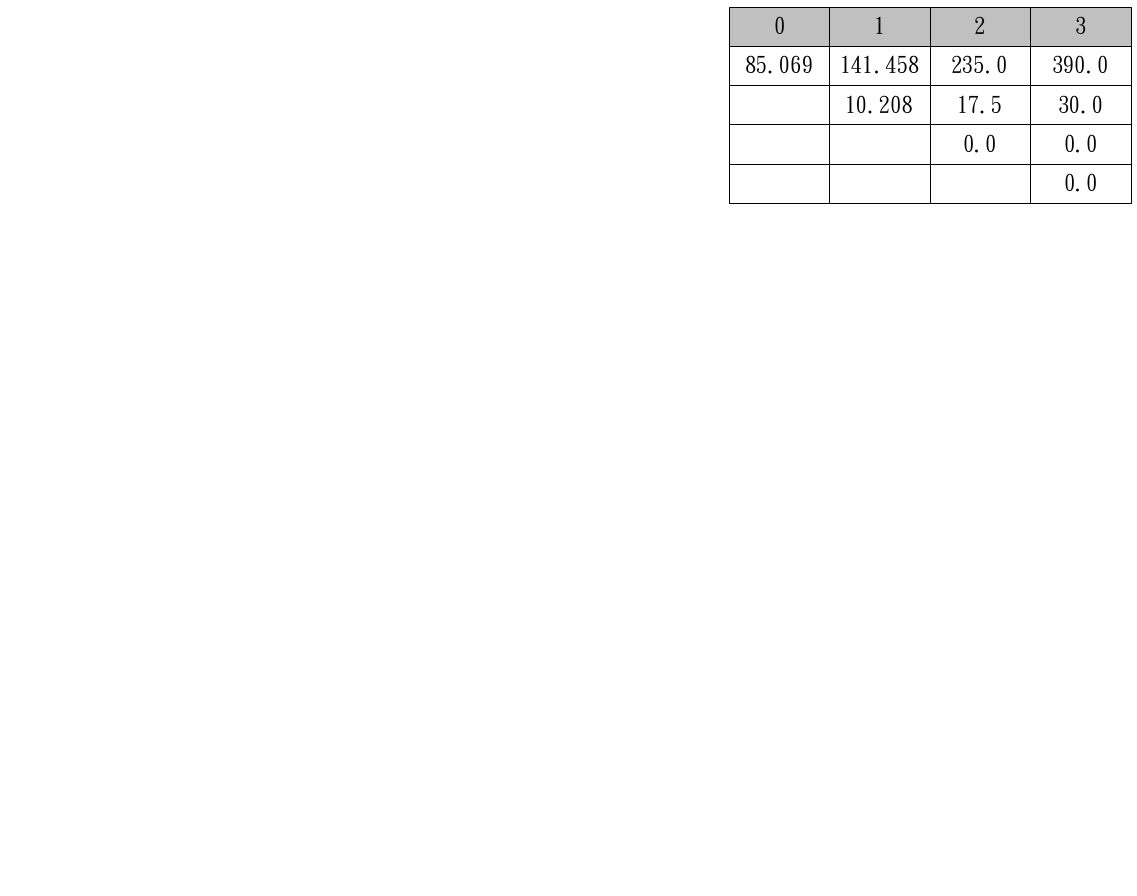

In [3]:
# graph of option prices
import matplotlib.pyplot as plt
import pandas as pd
present_o = []
for i in range(len(o_price)):
    present_o.append(list(" "*(period+1)))
for i in range(len(o_price)):
    for j in range(len(o_price[i])):
        present_o[j][i] = o_price[i][j]
print(present_o)
plt.figure(figsize=(12, 12))
font = {'family' : 'DFKai-SB',
'weight' : 'bold',
'size'  : '30'} #字型設定
plt.rc('font', **font) #字型設定 # pass in the font dict as kwargs
plt.rc('axes',unicode_minus=False) #字型設定
col_labels = []
for i in range(len(present_o)):
    col_labels.append(str(i))
row_colors = [] 
for i in range(len(col_labels)):
    if i%2 == 0:
        row_colors.append("silver")
    else:
        row_colors.append("silver")
plt.axis('off')
present_2 = pd.DataFrame(present_o, columns=col_labels)
#print(present_l2)
plt.table(cellText=present_2.values, colLabels=present_2.columns,loc='right',colColours=row_colors,cellLoc = 'center', bbox=[1,1,period*0.2, period*0.1])
plt.show() #以表格輸出

[[0.82], [0.906, 0.219], [1.0, 0.25, 0.0]]


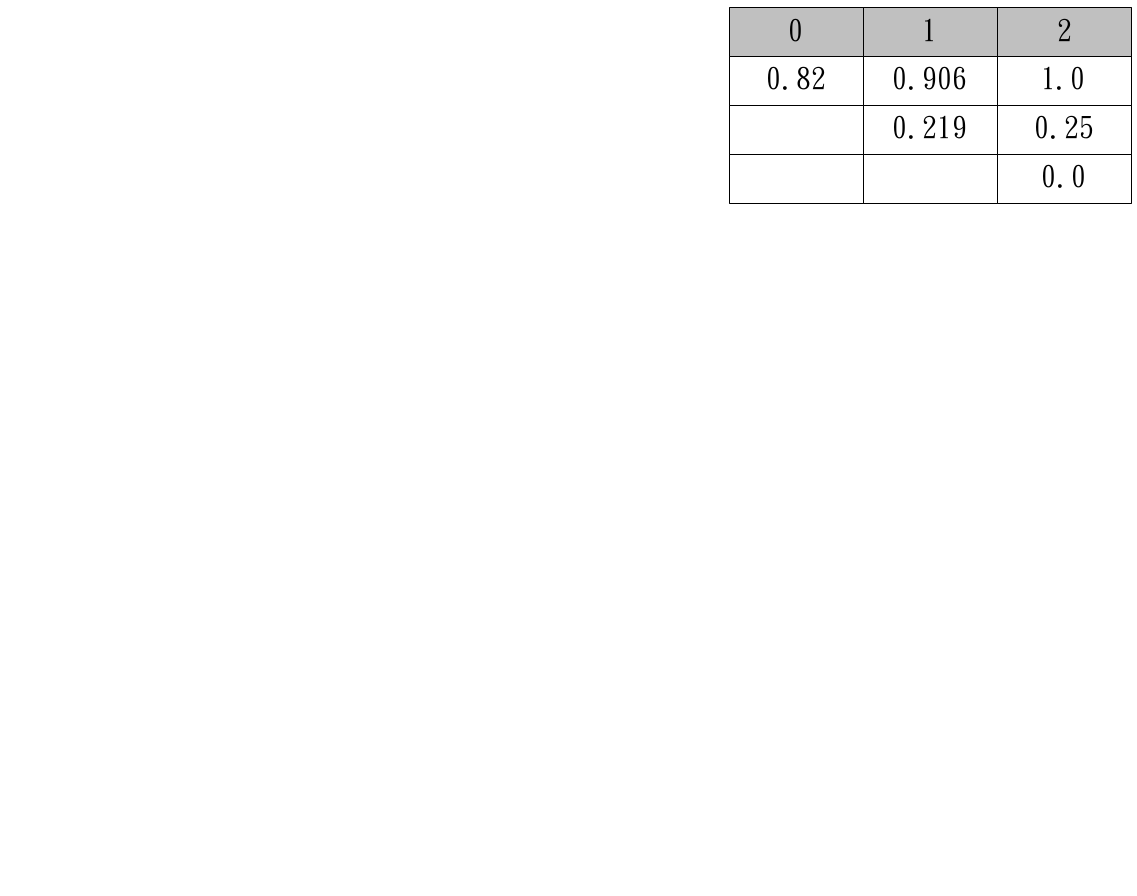

In [5]:
# graph of hedge ratio
h_l = [] #hedge ratio
for i in range(period):
    h_l.append([])

for i in range(period):
    for j in range(period-i):
        #print(o_price[period-i][j],o_price[period-i][j+1],s_price[period-i][j],s_price[period-i][j+1])
        h_l[period-i-1].append(round( (o_price[period-i][j] - o_price[period-i][j+1])/(s_price[period-i][j] - s_price[period-i][j+1]),3))
print(h_l)

present_h = []
for i in range(len(h_l)):
    present_h.append(list(" "*len(h_l)))
for i in range(len(h_l)):
    for j in range(len(h_l[i])):
        present_h[j][i] = h_l[i][j]
        
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=(12, 12))
font = {'family' : 'DFKai-SB',
'weight' : 'bold',
'size'  : '30'} #字型設定
plt.rc('font', **font) #字型設定 # pass in the font dict as kwargs
plt.rc('axes',unicode_minus=False) #字型設定
col_labels = []
for i in range(len(h_l)):
    col_labels.append(str(i))
row_colors = [] 
for i in range(len(col_labels)):
    if i%2 == 0:
        row_colors.append("silver")
    else:
        row_colors.append("silver")
plt.axis('off')
present_2 = pd.DataFrame(present_h, columns=col_labels)
plt.table(cellText=present_2.values, colLabels=present_2.columns,loc='right',colColours=row_colors,cellLoc = 'center', bbox=[1,1,period*0.2, period*0.1])
plt.show() #以表格輸出